# Prova IA : Questão 3 


## Thales Monteiro Soares  

#### Facebook Live Sellers in Thailand Data Set é uma base que contém informações de páginas do facebook de 10 vendedores de moda e cosméticos tailandeses. Publicações do tipo vídeo, fotos, status e links.

#### Base utilizada: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Drop das 4 últimas colunas com atributo NAN

In [3]:
df = df.drop(df.iloc[:,12:], axis = 1)

### Drop do status_id

In [4]:
df = df.drop('status_id', axis = 1)

In [5]:
print('Valores duplicados:', df.duplicated().value_counts())

Valores duplicados: False    6996
True       54
dtype: int64


### Drop dos valores duplicados

In [6]:
df = df.drop_duplicates()

In [7]:
#Resetando index da base
df = df.reset_index()
df.drop("index", axis = 1, inplace=True)

### Verificando valores Nulos

In [8]:
print('Valores faltantes:', df.isnull().sum())

Valores faltantes: status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


### Boxplot da base

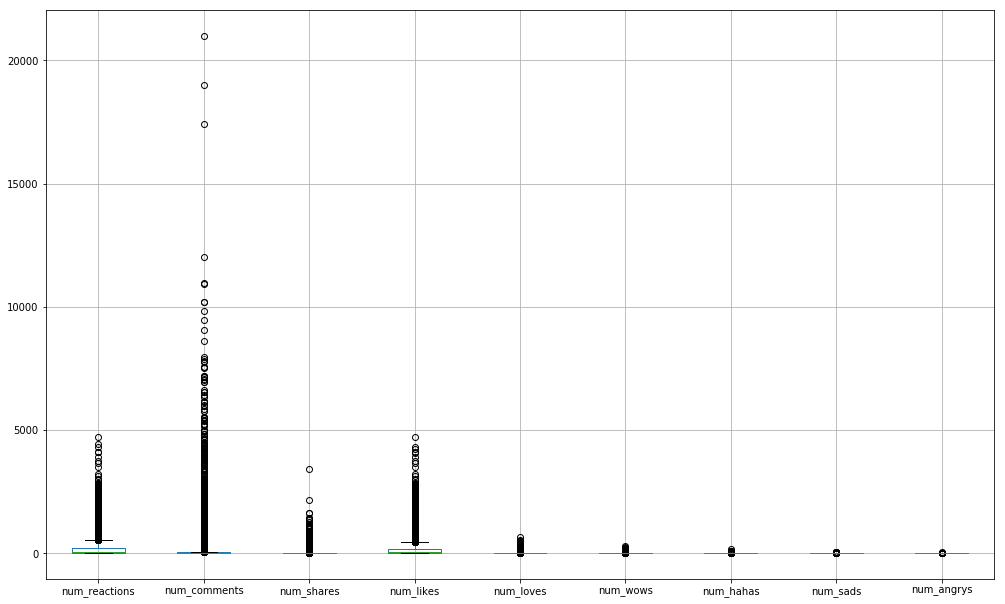

In [9]:
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
df.boxplot()

### Verificando Outliers na coluna num_comments

In [10]:
df['num_comments'].nlargest(10)

498     20990
480     19013
6703    17404
3246    12003
6708    10960
6745    10926
6605    10194
6394    10186
6721     9831
3890     9452
Name: num_comments, dtype: int64

In [11]:
df.drop([498, 480, 6703, 3246], axis = 0 ,inplace = True)

In [12]:
df = df.reset_index()
df.drop("index", axis = 1, inplace=True)

## Realizando Label Encoder na coluna status_type

In [13]:
from sklearn.preprocessing import LabelEncoder

status_type = LabelEncoder().fit_transform(df['status_type'])
df['status_type'] = status_type

## Excluindo coluna status_published pois a informação de horário não é relevante.

In [14]:
df.drop("status_published", axis = 1, inplace = True)

In [15]:
x = df

# <center> Algoritmos de Clustering </center>

## Hierárquico single linkage

### O single linkage utiliza a menor das distâncias existentes entre dois clusters no processo de concatenação de clusters. 

### n_cluster = 3

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

In [18]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6990
1,1
2,1


### n_cluster = 10

In [19]:
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

In [20]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6979
1,3
2,2
3,2
4,1
5,1
6,1
7,1
8,1
9,1


## Hierárquico complete linkage

### O complete linkage a diferença é que este algoritmo utiliza a maior das distâncias existentes durante o processo de concatenação de clusters. 

### n_cluster = 3

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

In [22]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6815
1,126
2,51


### n_cluster = 4

In [23]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

In [24]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6815
1,126
2,43
3,8


### n_cluster = 5

In [25]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

In [26]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6635
1,180
2,126
3,43
4,8


### n_cluster = 10

In [27]:
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

In [28]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6306
1,329
2,130
3,117
4,48
5,28
6,15
7,9
8,8
9,2


## K-Means
#### Centroides definidos de forma randômica. 

### K = 2

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state= 15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])


,Nº Instancias
0,6829
1,163


### K = 3

In [30]:
kmeans = KMeans(n_clusters=3, random_state= 15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6373
1,471
2,148


### K = 5

In [31]:
kmeans = KMeans(n_clusters=5, random_state=15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6020
1,427
2,399
3,110
4,36


### K = 10

In [32]:
kmeans = KMeans(n_clusters=10, random_state= 15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4831
1,825
2,543
3,237
4,185
5,159
6,86
7,78
8,40
9,8


## Normalizando a base
### Realizando normalização da base para verificar o desempenho dos algoritmos com a base normalizada e não normalizada.

In [33]:
# Foi utilizada a seguinte função para normalizar os dados
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [34]:
x = normalize(x)

## Executando Hierárquico com base normalizada

## Single Linkage

In [35]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6990
1,1
2,1


In [36]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6988
1,1
2,1
3,1
4,1


## Complete Linkage

In [37]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4293
1,2663
2,21
3,15


In [38]:
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4284
1,2500
2,99
3,64
4,18
5,15
6,7
7,2
8,2
9,1


## K-Means

In [39]:
kmeans = KMeans(n_clusters=2, random_state=15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4305
1,2687


In [40]:
kmeans = KMeans(n_clusters=3, random_state=15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4109
1,2563
2,320


In [41]:
kmeans = KMeans(n_clusters=5, random_state=15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4113
1,2049
2,307
3,285
4,238


# <center> Comparando Resultados </center>

## <center> Hierárquico Single Linkage </center>

                                                     Não normalizado   Normalizado
K = 3|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6990|		6990
|1	|1|		1
|2	|1|		1


K = 5|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6988|		6988
|1	|1|		1
|2	|1|		1
|3	|1|		1
|4	|1|		1

K = 10|Número de Clusters | Número de Instâncias | Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6979|		6982
|1	|3|		2
|2	|2|		1
|3	|2|		1
|4	|1|		1
|5	|1|		1
|6	|1|		1
|7	|1|		1
|8	|1|		1
|9	|1|  	1

## <center> Hierárquico Completed Linkage </center>

                                                     Não normalizado   Normalizado
K = 2|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6815|		6956
|1	|126|		21
|2	|51|		15



K = 4|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6815|		4293
|1	|126|		2663
|2	|43|		21
|3	|8|		15




K = 5|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6635|		4293
|1	|180|		2564
|2	|126|		99
|3	|43|		21
|4	|8|		15

K = 10|Número de Clusters | Número de Instâncias | Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6306|		4284
|1	|329|		2500
|2	|130|		99
|3	|117|		64
|4	|48|		18
|5	|28|		15
|6	|15|		7
|7	|9|		2
|8	|8|		2
|9	|2|  	1

## <center> K-Means </center>

                                                     Não normalizado   Normalizado
K = 2|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6829|		4305
|1	|163|		2687


K = 3|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6373|		4109
|1	|471|		2563
|2	|148|		320


K = 5|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6020|		4113
|1	|427|		2049
|2	|399|		307
|3	|110|		285
|4	|36|		238


K = 10|Número de Clusters | Número de Instâncias | Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|4831|		3782
|1	|825|		1516
|2	|543|		554
|3	|237|		308
|4	|185|		305
|5	|159|		156
|6	|86|	    125
|7	|78|		108
|8	|40|		80
|9	|8|  	58

### Quando os dados não estao normalizados, tanto o hierarquico quanto o kmeans, apresentam uma concentração de dados em um único cluster.  Quando normalizados ambos os algoritmos geravam um cluster mais distribuido. 


# Aplicando PCA

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dfpca = pca.fit_transform(x)

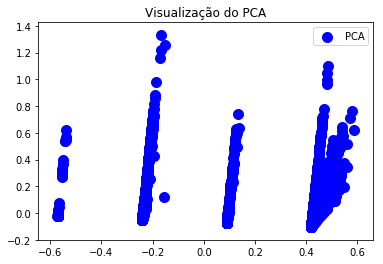

In [43]:
plt.scatter(dfpca[:,0], dfpca[:,1], s = 100, c = 'blue', label = 'PCA')
plt.title('Visualização do PCA')
plt.legend()

In [44]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(dfpca)

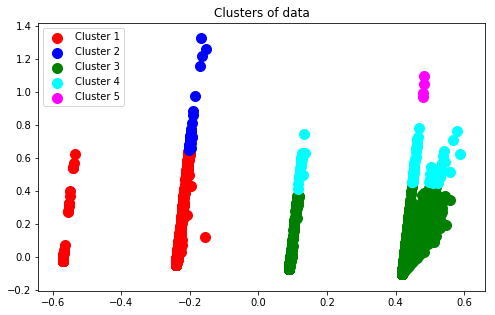

In [45]:
# Visualising the clusters
x_size = 8
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
           
plt.scatter(dfpca[y_hc == 0,0], dfpca[y_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dfpca[y_hc == 1,0], dfpca[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dfpca[y_hc == 2,0], dfpca[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dfpca[y_hc == 3,0], dfpca[y_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(dfpca[y_hc == 4,0], dfpca[y_hc == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of data')

plt.legend()


# PCA COM KMEANS

In [46]:
kmeans = KMeans(n_clusters=5, random_state=15).fit(dfpca)
y_hc = kmeans.labels_

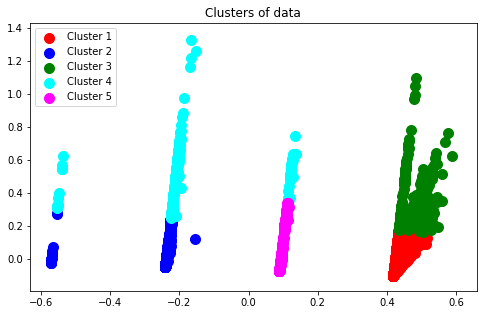

In [47]:
# Visualising the clusters
x_size = 8
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
                    
plt.scatter(dfpca[y_hc == 0,0], dfpca[y_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dfpca[y_hc == 1,0], dfpca[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dfpca[y_hc == 2,0], dfpca[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dfpca[y_hc == 3,0], dfpca[y_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(dfpca[y_hc == 4,0], dfpca[y_hc == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of data')
plt.legend()